**Chemical in Cosmetics Dataset:**

- These data reflect information that has been reported to the California Safe Cosmetics Program (CSCP) in the California Department of Public Health (CDPH). The primary purpose of the CSCP is to collect information on hazardous and potentially hazardous ingredients in cosmetic products sold in California and to make this information available to the public.

- For all cosmetic products sold in California, the California Safe Cosmetics Act (“the Act”) requires the manufacturer, packer, and/or distributor named on the product label to provide to the CSCP a list of all cosmetic products that contain any ingredients known or suspected to cause cancer, birth defects, or other developmental or reproductive harm.

- The data table consists of label names of cosmetic/personal care products, company/manufacturer names, product brand names, product categories, Chemical Abstracts Service registry numbers (CAS#) of the reported chemical ingredients, names of reported chemical ingredients, the number of reported chemicals for each product, and dates of reporting, product discontinuation or reformulation if applicable.


Source: https://data.ca.gov/dataset/chemicals-in-cosmetics

-----------------------------------------------------------
**Assignment:**

Understanding the Data

- How would you initially assess the dataset provided? What are the key aspects you look for before processing?
- Example: Explain the significance of columns like ProductName, ChemicalId, and DiscontinuedDate.

Preprocessing and Cleaning

- What preprocessing steps would you take to clean this dataset before building any models?

Exploratory Data Analysis (EDA)

- Describe the basic exploratory data analysis steps you would perform on this dataset.
- Example: What visualizations or statistical summaries would you use to understand the distribution of ChemicalId across different ProductNames?

Key Insights and Analysis

- What key insights would you aim to extract from this dataset? How would these insights inform business decisions or further analysis?

- Example: How would you use clustering techniques to group similar products based on their chemical composition?

________________________________________
Note: Feel free to use any clustering, regression-based, machine learning algorithms, etc., to derive insights and enhance your analysis. The examples are not required.


### Uploading Dataset

In [ ]:
import pandas as pd
import plotly.express as px

### Importing Dataset

In [ ]:
dataset_original = pd.read_csv("/content/interviewtestdataset.csv")
dataset_original.head(2)

,CDPHId,ProductName,CSFId,CSF,CompanyId,CompanyName,BrandName,PrimaryCategoryId,PrimaryCategory,SubCategoryId,...,CasNumber,ChemicalId,ChemicalName,InitialDateReported,MostRecentDateReported,DiscontinuedDate,ChemicalCreatedAt,ChemicalUpdatedAt,ChemicalDateRemoved,ChemicalCount
0,2,ULTRA COLOR RICH EXTRA PLUMP LIPSTICK-ALL SHADES,NaN,NaN,4,New Avon LLC,AVON,44,Makeup Products (non-permanent),53,...,13463-67-7,6,Titanium dioxide,06/17/2009,08/28/2013,02-01-2011,07-09-2009,07-09-2009,NaN,1
1,3,Glover's Medicated Shampoo,NaN,NaN,338,J. Strickland & Co.,Glover's,18,Hair Care Products (non-coloring),25,...,65996-92-1,4,Distillates (coal tar),07-01-2009,07-01-2009,NaN,07-01-2009,07-01-2009,NaN,2


### Drop duplicates

In [ ]:
dataset = dataset_original.drop_duplicates()
orig_rows, orig_cols = dataset_original.shape
new_rows, new_cols = dataset.shape

print(f"Original DataFrame: {orig_rows} rows, {orig_cols} columns")
print(f"DataFrame without duplicates: {new_rows} rows, {new_cols} columns")
print(f"Number of duplicate rows removed: {orig_rows - new_rows}")


Original DataFrame: 114635 rows, 22 columns
DataFrame without duplicates: 114381 rows, 22 columns
Number of duplicate rows removed: 254


In [ ]:
# Show all rows that are duplicates (not just the first occurrence)
duplicate_rows = dataset_original[dataset_original.duplicated(keep=False)]

# Display the first 5 duplicate rows
duplicate_rows.head(2)


,CDPHId,ProductName,CSFId,CSF,CompanyId,CompanyName,BrandName,PrimaryCategoryId,PrimaryCategory,SubCategoryId,...,CasNumber,ChemicalId,ChemicalName,InitialDateReported,MostRecentDateReported,DiscontinuedDate,ChemicalCreatedAt,ChemicalUpdatedAt,ChemicalDateRemoved,ChemicalCount
15086,3488,CHI Scentuals Mango Melon Hand and Body Wash,NaN,NaN,120,"Farouk Systems, Inc.",CHI,6,Bath Products,159,...,0,0,Trade Secret,10-12-2009,10-12-2009,NaN,10-12-2009,10-12-2009,NaN,1
15087,3488,CHI Scentuals Mango Melon Hand and Body Wash,NaN,NaN,120,"Farouk Systems, Inc.",CHI,6,Bath Products,159,...,0,0,Trade Secret,10-12-2009,10-12-2009,NaN,10-12-2009,10-12-2009,NaN,1


In [ ]:
dataset.head(5)

,CDPHId,ProductName,CSFId,CSF,CompanyId,CompanyName,BrandName,PrimaryCategoryId,PrimaryCategory,SubCategoryId,...,CasNumber,ChemicalId,ChemicalName,InitialDateReported,MostRecentDateReported,DiscontinuedDate,ChemicalCreatedAt,ChemicalUpdatedAt,ChemicalDateRemoved,ChemicalCount
0,2,ULTRA COLOR RICH EXTRA PLUMP LIPSTICK-ALL SHADES,NaN,NaN,4,New Avon LLC,AVON,44,Makeup Products (non-permanent),53,...,13463-67-7,6,Titanium dioxide,06/17/2009,08/28/2013,02-01-2011,07-09-2009,07-09-2009,NaN,1
1,3,Glover's Medicated Shampoo,NaN,NaN,338,J. Strickland & Co.,Glover's,18,Hair Care Products (non-coloring),25,...,65996-92-1,4,Distillates (coal tar),07-01-2009,07-01-2009,NaN,07-01-2009,07-01-2009,NaN,2
2,3,Glover's Medicated Shampoo,NaN,NaN,338,J. Strickland & Co.,Glover's,18,Hair Care Products (non-coloring),25,...,140-67-0,5,Estragole,07-01-2009,07-01-2009,NaN,07-02-2009,07-02-2009,NaN,2
3,4,PRECISION GLIMMER EYE LINER-ALL SHADES �,NaN,NaN,4,New Avon LLC,AVON,44,Makeup Products (non-permanent),46,...,13463-67-7,7,Titanium dioxide,07-09-2009,08/28/2013,NaN,07-09-2009,07-09-2009,NaN,1
4,5,AVON BRILLIANT SHINE LIP GLOSS-ALL SHADES �,NaN,NaN,4,New Avon LLC,AVON,44,Makeup Products (non-permanent),52,...,13463-67-7,8,Titanium dioxide,07-09-2009,08/28/2013,02-01-2011,07-09-2009,07-09-2009,NaN,1


In [ ]:
dataset.sample(1).T

,40628
CDPHId,14437
ProductName,NARS Eyeliner Pencil
CSFId,20244.0
CSF,Mambo
CompanyId,352
CompanyName,Nars Cosmetics
BrandName,NARS
PrimaryCategoryId,44
PrimaryCategory,Makeup Products (non-permanent)
SubCategoryId,46


### Dataset Size & Columns

In [ ]:
rows, cols = dataset.shape
print(f"Dataset Size:\n - Total Rows: {rows}\n - Total Columns: {cols}")

Dataset Size:
 - Total Rows: 114381
 - Total Columns: 22


✈✈✈✈✈✈✈✈✈✈✈

In [ ]:
dataset.columns

Index(['CDPHId', 'ProductName', 'CSFId', 'CSF', 'CompanyId', 'CompanyName',
       'BrandName', 'PrimaryCategoryId', 'PrimaryCategory', 'SubCategoryId',
       'SubCategory', 'CasId', 'CasNumber', 'ChemicalId', 'ChemicalName',
       'InitialDateReported', 'MostRecentDateReported', 'DiscontinuedDate',
       'ChemicalCreatedAt', 'ChemicalUpdatedAt', 'ChemicalDateRemoved',
       'ChemicalCount'],
      dtype='object')

| **Column Name**          | **Description**                                                                                                                                                                                                                                                          |
|--------------------------|--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| **CDPHId**               | Likely an identifier associated with a specific regulatory or health-related database. “CDPH” often stands for the "California Department of Public Health" or a similar public health organization. This could be a unique ID used by that department to track a particular product or listing. |
| **ProductName**          | The name of the product being referenced. This is generally the commercial or common name used in the marketplace.                                                                                                                                                       |
| **CSFId**                |  "Chemical Source File" ID. In many regulatory contexts, “CSF” is used to denote a record or ID related to the composition of a product or a formula associated with it.                                    |
| **CSF**                  | The actual Confidential Statement of Formula (if provided) or a textual reference to a formula listing. It may also be a code indicating the type of chemical composition or formula details.                                                                                   |
| **CompanyId**            | A unique identifier for the company associated with the product. Useful for joining or linking this data to a separate table of company information.                                                                                                                        |
| **CompanyName**          | The name of the company that manufactures or distributes the product.                                                                                                                                                                                                 |
| **BrandName**            | The brand under which the product is sold, which might differ from the parent company’s name if they own multiple brands.                                                                                                                                                  |
| **PrimaryCategoryId**    | A unique identifier for the product’s primary category. This might be used for classification within a taxonomy of products (e.g., "Household Cleaners," "Personal Care Products," etc.).                                                                                     |
| **PrimaryCategory**      | The textual name or label of the product’s primary category (e.g., "Personal Care").                                                                                                                                                                                   |
| **SubCategoryId**        | A unique identifier for a more specific classification that falls under the primary category. For instance, if the PrimaryCategory is "Personal Care," a SubCategory could be "Shampoo."                                                                                         |
| **SubCategory**          | The textual name of the sub-category (e.g., "Shampoo").                                                                                                                                                                                                                |
| **CasId**                | An internal or database-specific ID tied to a chemical. This may not be the same as the CAS Registry Number, but rather a unique identifier in the dataset.                                                                                                                 |
| **CasNumber**            | The CAS (Chemical Abstracts Service) Registry Number, a unique numerical identifier assigned to every chemical substance reported in the open scientific literature. It is commonly used to identify a chemical unambiguously.                                                |
| **ChemicalId**           | A database-specific unique identifier for a particular chemical. This might be used to link to a chemical details table.                                                                                                                                                 |
| **ChemicalName**         | The common or standardized name of the chemical in the product. Often corresponds to the IUPAC name or another widely recognized chemical name.                                                                                                                              |
| **InitialDateReported**  | The first date when this product-chemical combination was reported. It might correspond to when it was first introduced, registered, or discovered in the dataset.                                                                                                            |
| **MostRecentDateReported** | The latest date on record when this product-chemical information was updated or confirmed. Useful for historical tracking of chemical usage in the product.                                                                                                                   |
| **DiscontinuedDate**     | If applicable, the date when the product was discontinued or the chemical was no longer used in the product.                                                                                                                                                              |
| **ChemicalCreatedAt**    | The timestamp or date when the chemical record was created in the database. This is a metadata field used for internal data management.                                                                                                                                        |
| **ChemicalUpdatedAt**    | The timestamp or date of the most recent update to the chemical record. Another metadata field important for audit and version control.                                                                                                                                     |
| **ChemicalDateRemoved**  | The date the chemical was removed from the dataset or from the product’s formulation. This might correspond to regulatory changes, reformulation, or product retirement.                                                                                                       |
| **ChemicalCount**        | Potentially the count of how many chemicals are associated with a product, or how frequently this particular chemical appears across different products. The exact meaning depends on the dataset’s design—this could be a summary field.                                       |


Understanding the Data

- How would you initially assess the dataset provided? What are the key aspects you look for before processing?

- Example: Explain the significance of columns like ProductName, ChemicalId, and DiscontinuedDate.

| **Section**              | **Field**                              | **Description**                                                                                                         |
|--------------------------|----------------------------------------|-------------------------------------------------------------------------------------------------------------------------|
| **Entities and Identifiers** | `CDPHId`                           | Likely an identifier related to the California Department of Public Health or a similar regulatory body.                |
|                          | `ProductName`                          | The name of the chemical product.                                                                                       |
|                          | `CSFId` & `CSF`                        | Could refer to a specific classification system or standard used for categorizing chemicals or products.                |
|                          | `CompanyId` & `CompanyName`            | Identifiers and names of companies that manufacture or distribute the products.                                        |
|                          | `BrandName`                            | The brand under which the product is marketed.                                                                          |
| **Categorization**       | `PrimaryCategoryId` & `PrimaryCategory`| The main category under which the product falls.                                                                        |
|                          | `SubCategoryId` & `SubCategory`        | A more detailed classification within the primary category.                                                             |
| **Chemical Information** | `CasId` & `CasNumber`                   | References to the Chemical Abstracts Service (CAS) registry, which provides unique identifiers for chemicals.           |
|                          | `ChemicalId` & `ChemicalName`           | Identifiers and names of the specific chemicals contained in the product.                                               |
| **Date Fields**          | `InitialDateReported`                  | When the product or chemical was first reported or registered.                                                          |
|                          | `MostRecentDateReported`               | The latest date of reporting or update.                                                                                  |
|                          | `DiscontinuedDate`                     | When the product was discontinued, if applicable.                                                                       |
|                          | `ChemicalCreatedAt` & `ChemicalUpdatedAt`| Timestamps for when the chemical data was created and last updated in the system.                                     |
|                          | `ChemicalDateRemoved`                  | When the chemical was removed from the product or system.                                                                |
| **Quantitative Data**    | `ChemicalCount`                        | Possibly the number of chemicals in a product or the count of reports related to a chemical.                            |


In [ ]:
# Display detailed information about the DataFrame
dataset.info()


<class 'pandas.core.frame.DataFrame'>
Index: 114381 entries, 0 to 114634
Data columns (total 22 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   CDPHId                  114381 non-null  int64  
 1   ProductName             114381 non-null  object 
 2   CSFId                   80650 non-null   float64
 3   CSF                     80225 non-null   object 
 4   CompanyId               114381 non-null  int64  
 5   CompanyName             114381 non-null  object 
 6   BrandName               114154 non-null  object 
 7   PrimaryCategoryId       114381 non-null  int64  
 8   PrimaryCategory         114381 non-null  object 
 9   SubCategoryId           114381 non-null  int64  
 10  SubCategory             114381 non-null  object 
 11  CasId                   114381 non-null  int64  
 12  CasNumber               107906 non-null  object 
 13  ChemicalId              114381 non-null  int64  
 14  ChemicalName            1

In [ ]:
# Create a summary of data types
dtype_summary = dataset.dtypes.value_counts().reset_index()
dtype_summary.columns = ['Data Type', 'Count']

# Display the summary
print(dtype_summary)


  Data Type  Count
0    object     14
1     int64      7
2   float64      1


### Missing values analysis

In [ ]:
# Get the number of unique values for each column
unique_counts = dataset.nunique()

# Add additional insights
unique_summary = pd.DataFrame({
    'unique_values': unique_counts,
    'missing_values': dataset.isnull().sum(),
    'total_values': dataset.count(),
    'dtype': dataset.dtypes
})

# Sort the summary for better interpretation (optional)
unique_summary = unique_summary.sort_values(by='unique_values', ascending=False)

# Display the summary with formatting
formatted_summary = unique_summary.style.set_caption("Summary of Unique and Missing Values") \
    .background_gradient(cmap='coolwarm', subset=['unique_values', 'missing_values'])

# Print the formatted summary
print(unique_summary)

                        unique_values  missing_values  total_values    dtype
CSFId                           58167           33731         80650  float64
ChemicalId                      58079               0        114381    int64
CDPHId                          36972               0        114381    int64
CSF                             34250           34156         80225   object
ProductName                     33716               0        114381   object
BrandName                        2713             227        114154   object
ChemicalUpdatedAt                2326               0        114381   object
ChemicalCreatedAt                2320               0        114381   object
InitialDateReported              2274               0        114381   object
MostRecentDateReported           2178               0        114381   object
DiscontinuedDate                  991          101508         12873   object
CompanyId                         635               0        114381    int64

In [ ]:
missing_values = dataset.isnull().sum()
total_rows = len(dataset)

missing_report = (missing_values
                  .to_frame('Missing Count')
                  .assign(Missing_Percentage=lambda x: x['Missing Count'] / total_rows * 100)
                  .sort_values('Missing_Percentage', ascending=False))



with pd.option_context('display.float_format', '{:.2f}%'.format):
    print("Missing Values Report:")
    print(missing_report)


Missing Values Report:
                        Missing Count  Missing_Percentage
ChemicalDateRemoved            111396              97.39%
DiscontinuedDate               101508              88.75%
CSF                             34156              29.86%
CSFId                           33731              29.49%
CasNumber                        6475               5.66%
BrandName                         227               0.20%
CDPHId                              0               0.00%
ChemicalId                          0               0.00%
ChemicalUpdatedAt                   0               0.00%
ChemicalCreatedAt                   0               0.00%
MostRecentDateReported              0               0.00%
InitialDateReported                 0               0.00%
ChemicalName                        0               0.00%
CasId                               0               0.00%
ProductName                         0               0.00%
SubCategory                         0            

✈✈✈✈✈✈✈✈✈✈✈

In [ ]:
import plotly.express as px

# Prepare the missing report data
missing_report_filtered = (
    missing_report
    .reset_index()
    .rename(columns={'index': 'Column'})
    .query('Missing_Percentage > 0')
    .sort_values('Missing_Percentage', ascending=True)
)

# Define the Celanese brand colors based on extracted shades
celanese_colors = ['#F07823', '#F05500', '#D14A23', '#A44F56']  # Using the extracted colors

# Create a horizontal bar plot with text labels
fig = px.bar(
    missing_report_filtered,
    x='Missing_Percentage',
    y='Column',
    orientation='h',
    title='Percentage of Missing Values by Column',
    color='Missing_Percentage',
    color_continuous_scale=celanese_colors,  # Use the updated color palette
    template='plotly_white',
    hover_data={'Missing_Percentage': ':.2f'},
    text='Missing_Percentage'
)

# Update trace for text formatting
fig.update_traces(
    texttemplate='%{text:.2f}%',
    textposition='inside',
    textfont=dict(color='white')
)

# Update layout for better aesthetics
fig.update_layout(
    xaxis_title="Missing Values (%)",
    yaxis_title="Column",
    height=600,
    width=900,
    margin=dict(l=150, r=50, t=80, b=50),
    coloraxis_colorbar=dict(title="Missing %")
)

# Customize axes
fig.update_xaxes(showgrid=True, gridcolor='lightgray', zeroline=False)
fig.update_yaxes(categoryorder='total ascending')

# Display the figure
fig.show()


In [ ]:
dataset.dtypes

,0
CDPHId,int64
ProductName,object
CSFId,float64
CSF,object
CompanyId,int64
CompanyName,object
BrandName,object
PrimaryCategoryId,int64
PrimaryCategory,object
SubCategoryId,int64


### Summary of the Dataset

In [ ]:
dataset.sample(4).T

,75013,17789,1821,9385
CDPHId,26976,4051,780,2633
ProductName,Eye Shadow Quad - Spellbound,Eye Shadow,Eyecolor,Sally Hansen Maximum Growth Plus Nourishing Na...
CSFId,41625.0,8830.0,33317.0,4690.0
CSF,Flare,Rose Quartz,Night Owl,Amazing Amethyst Creme
CompanyId,402,206,84,171
CompanyName,Caleel+Hayden,"Melaleuca, Inc.","Bare Escentuals Beauty, Inc.",Coty
BrandName,glo minerals,Sei Bella,bareMinerals,Sally Hansen
PrimaryCategoryId,44,44,44,59
PrimaryCategory,Makeup Products (non-permanent),Makeup Products (non-permanent),Makeup Products (non-permanent),Nail Products
SubCategoryId,48,48,48,65


In [ ]:
dataset.isnull().sum()

,0
CDPHId,0
ProductName,0
CSFId,33731
CSF,34156
CompanyId,0
CompanyName,0
BrandName,227
PrimaryCategoryId,0
PrimaryCategory,0
SubCategoryId,0


### Missing brand names with string : "Missing_BRAND_NAME"

In [ ]:
# Replace missing values in the BrandName column with 'Missing_BRAND_NAME'
dataset['BrandName'] = dataset['BrandName'].fillna('Missing_BRAND_NAME')

<ipython-input-26-0003ea562eb3>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
dataset.isnull().sum()

,0
CDPHId,0
ProductName,0
CSFId,33731
CSF,34156
CompanyId,0
CompanyName,0
BrandName,0
PrimaryCategoryId,0
PrimaryCategory,0
SubCategoryId,0


CSFId	"Chemical Source File" ID. In many regulatory contexts, “CSF” is used to denote a record or ID related to the composition of a product or a formula associated with it.

Missing values can be converted as "0" - As Unique_Identifier, meaning CSFId with 0 doesn't have any ID's associated

CSF	The actual Confidential Statement of Formula (if provided) or a textual reference to a formula listing. It may also be a code indicating the type of chemical composition or formula details.

Missing values can be converted as "Missing_CSF" - As Unique_Identifier, meaning CSFId with 0 doesn't have any ID's associated

CAS NUMBER

Missing values can be converted as "MISSING_CAS_NUMBER" - As Unique_Identifier, meaning CSFId with 0 doesn't have any ID's associated

In [ ]:
dataset['CSFId'] = dataset['CSFId'].fillna(0)
dataset['CSF'] = dataset['CSF'].fillna('Missing_CSF')

<ipython-input-28-bb7355039b2a>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-28-bb7355039b2a>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
dataset.isnull().sum()

,0
CDPHId,0
ProductName,0
CSFId,0
CSF,0
CompanyId,0
CompanyName,0
BrandName,0
PrimaryCategoryId,0
PrimaryCategory,0
SubCategoryId,0


In [ ]:
dataset['CasNumber'] = dataset['CasNumber'].fillna('MISSING_CAS_NUMBER')


<ipython-input-30-57ba0e4bb231>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
dataset.isnull().sum()

,0
CDPHId,0
ProductName,0
CSFId,0
CSF,0
CompanyId,0
CompanyName,0
BrandName,0
PrimaryCategoryId,0
PrimaryCategory,0
SubCategoryId,0


In [ ]:
# Create DiscontinuedFlag column: 0 if DiscontinuedDate is null, 1 otherwise
dataset['DiscontinuedFlag'] = dataset['DiscontinuedDate'].apply(lambda x: 0 if pd.isnull(x) else 1)
import numpy as np

# Create DiscontinuedFlag column using np.where
dataset['DiscontinuedFlag'] = np.where(dataset['DiscontinuedDate'].isnull(), 0, 1)


<ipython-input-34-185165770268>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-34-185165770268>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
# Check the count of rows for each value in DiscontinuedFlag
flag_counts = dataset['DiscontinuedFlag'].value_counts()
print(flag_counts)


DiscontinuedFlag
0    101508
1     12873
Name: count, dtype: int64


In [ ]:
# Create DiscontinuedFlag column using np.where
dataset['ChemicalRemovedFlag'] = np.where(dataset['ChemicalDateRemoved'].isnull(), 0, 1)

<ipython-input-36-a88fa591f9ce>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
dataset.sample(10)

,CDPHId,ProductName,CSFId,CSF,CompanyId,CompanyName,BrandName,PrimaryCategoryId,PrimaryCategory,SubCategoryId,...,ChemicalName,InitialDateReported,MostRecentDateReported,DiscontinuedDate,ChemicalCreatedAt,ChemicalUpdatedAt,ChemicalDateRemoved,ChemicalCount,DiscontinuedFlag,ChemicalRemovedFlag
112233,40842,K-Palette Lasting 3Way Eyebrow Pencil [04Grayi...,0.0,Missing_CSF,1341,"Oceana USA, Inc.",Cuore,44,Makeup Products (non-permanent),46,...,Titanium dioxide,01-08-2020,01-08-2020,NaN,01-08-2020,01-08-2020,NaN,2,0,0
1248,492,Renewist Lipcolor- Raspberry Rush,0.0,Missing_CSF,23,Revlon Consumer Product Corporation,Revlon,44,Makeup Products (non-permanent),53,...,Titanium dioxide,09-08-2009,09-08-2009,NaN,09-08-2009,09-08-2009,NaN,1,0,0
107512,38726,barePro Performance Wear Powder Foundation,61552.0,Almond,84,"Bare Escentuals Beauty, Inc.",bareMinerals,44,Makeup Products (non-permanent),50,...,Titanium dioxide,08/21/2019,10/15/2019,NaN,08/21/2019,08/21/2019,NaN,2,0,0
63543,22792,Luminous Body Souffle Forever Midnight,0.0,Missing_CSF,556,Victoria's Secret Beauty,Bath & Body Works,90,Skin Care Products,102,...,Titanium dioxide,04-11-2014,04-11-2014,NaN,04-11-2014,04-11-2014,NaN,1,0,0
19312,4708,SINGLE EYESHADOW,9364.0,LIME GREEN,30,"NYX Los Angeles, Inc.",NYX,44,Makeup Products (non-permanent),48,...,Butylated hydroxyanisole,10/14/2009,12/30/2010,NaN,10/14/2009,10/14/2009,NaN,2,0,0
3721,1188,Lasting Eyecolor,1745.0,Champagne,91,Merle Norman Cosmetics,Missing_BRAND_NAME,44,Makeup Products (non-permanent),48,...,Titanium dioxide,09/19/2009,11/22/2011,11/22/2011,09/19/2009,09/19/2009,NaN,1,1,0
10441,2708,TRIO EYESHADOW,5092.0,FROSTED LILAC/PACIFIC/KIWI,30,"NYX Los Angeles, Inc.",NYX,44,Makeup Products (non-permanent),48,...,Butylated hydroxyanisole,10-07-2009,12/30/2010,NaN,10-07-2009,10-07-2009,NaN,1,0,0
84619,30665,MILANI FIERCE FOIL EYESHINE,47101.0,Missing_CSF,1159,MILANI COSMETICS,MILANI,44,Makeup Products (non-permanent),48,...,Mica,06-05-2017,06-05-2017,NaN,06-05-2017,06-05-2017,NaN,3,0,0
72876,26388,SEPHORA - Crayon pour les yeux en gel mat / Co...,40197.0,04 Steel-ing Hearts,198,S+,SEPHORA,44,Makeup Products (non-permanent),46,...,Titanium dioxide,06/16/2015,06/16/2015,NaN,06/16/2015,06/16/2015,NaN,1,0,0
7205,2358,Shu Uemura Face Architect Remodeling Cream Fou...,3705.0,Medium Dark 734,67,L'Oreal USA,Shu Uemura,44,Makeup Products (non-permanent),50,...,Titanium dioxide,10-05-2009,12/30/2010,NaN,10-05-2009,10-05-2009,NaN,1,0,0


In [ ]:
# Filter rows where DiscontinuedFlag is 1 (DiscontinuedDate is not null)
present_discontinued = dataset[dataset['ChemicalRemovedFlag'] == 0]
present_discontinued.head()


,CDPHId,ProductName,CSFId,CSF,CompanyId,CompanyName,BrandName,PrimaryCategoryId,PrimaryCategory,SubCategoryId,...,ChemicalName,InitialDateReported,MostRecentDateReported,DiscontinuedDate,ChemicalCreatedAt,ChemicalUpdatedAt,ChemicalDateRemoved,ChemicalCount,DiscontinuedFlag,ChemicalRemovedFlag
0,2,ULTRA COLOR RICH EXTRA PLUMP LIPSTICK-ALL SHADES,0.0,Missing_CSF,4,New Avon LLC,AVON,44,Makeup Products (non-permanent),53,...,Titanium dioxide,06/17/2009,08/28/2013,02-01-2011,07-09-2009,07-09-2009,NaN,1,1,0
1,3,Glover's Medicated Shampoo,0.0,Missing_CSF,338,J. Strickland & Co.,Glover's,18,Hair Care Products (non-coloring),25,...,Distillates (coal tar),07-01-2009,07-01-2009,NaN,07-01-2009,07-01-2009,NaN,2,0,0
2,3,Glover's Medicated Shampoo,0.0,Missing_CSF,338,J. Strickland & Co.,Glover's,18,Hair Care Products (non-coloring),25,...,Estragole,07-01-2009,07-01-2009,NaN,07-02-2009,07-02-2009,NaN,2,0,0
3,4,PRECISION GLIMMER EYE LINER-ALL SHADES �,0.0,Missing_CSF,4,New Avon LLC,AVON,44,Makeup Products (non-permanent),46,...,Titanium dioxide,07-09-2009,08/28/2013,NaN,07-09-2009,07-09-2009,NaN,1,0,0
4,5,AVON BRILLIANT SHINE LIP GLOSS-ALL SHADES �,0.0,Missing_CSF,4,New Avon LLC,AVON,44,Makeup Products (non-permanent),52,...,Titanium dioxide,07-09-2009,08/28/2013,02-01-2011,07-09-2009,07-09-2009,NaN,1,1,0


In [ ]:
dataset.isnull().sum()

,0
CDPHId,0
ProductName,0
CSFId,0
CSF,0
CompanyId,0
CompanyName,0
BrandName,0
PrimaryCategoryId,0
PrimaryCategory,0
SubCategoryId,0


Exploratory Data Analysis (EDA)

- Describe the basic exploratory data analysis steps you would perform on this dataset.
- Example: What visualizations or statistical summaries would you use to understand the distribution of ChemicalId across different ProductNames?


In [ ]:
# Count the number of unique ChemicalName values
unique_chemical_count = dataset['ChemicalName'].nunique()
print(f"Number of unique Chemicals values: {unique_chemical_count}")

Number of unique Chemicals values: 123


✈✈✈✈✈✈✈✈✈✈✈

In [ ]:
dataset['ChemicalCount'].describe()

,ChemicalCount
count,114381.000000
mean,1.288982
std,0.636974
min,0.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,9.000000


**Chemical Count**:

- The **relatively small standard deviation** (0.64) suggests that the values of ChemicalCount don't vary too widely from the mean of 1.29. Most of the values are close to 1, with only a few data points stretching up to a maximum of 9.

- The **maximum value** is 9, which is the highest recorded chemical count. This indicates that the ChemicalCount values range from 0 to 9, with the majority of values clustered around 1.

- **Possible Outliers**: While most values are clustered around 1, the presence of values like 9 might indicate outliers or rare events where a higher chemical count is recorded.



In [ ]:
import plotly.graph_objects as go  # Import the necessary module

celanese_colors = ['#007AC2', '#FFA500', '#004B87']  # Updated to include orange for line chart

# Calculate total count for percentage calculation
total_count = dataset['ChemicalCount'].count()

# Create histogram data
histogram = go.Histogram(
    x=dataset['ChemicalCount'],
    marker_color=celanese_colors[0],  # Use the first Celanese color
    opacity=0.75,  # Set transparency for better visualization
    name='Histogram',
    texttemplate='%{y} (%{customdata:.2f}%)',  # Display the y-value and percentage
    textposition='outside',  # Position the text above the bar
    customdata=[(count / total_count) * 100 for count in dataset['ChemicalCount'].value_counts().sort_index().values]  # Calculate percentages
)

# Create smoothed line chart data
line_chart = go.Scatter(
    x=dataset['ChemicalCount'].value_counts().sort_index().index,  # Unique ChemicalCount values
    y=dataset['ChemicalCount'].value_counts().sort_index().values,  # Corresponding frequencies
    mode='lines+markers',  # Line chart with markers
    name='Line Chart',
    line=dict(color=celanese_colors[1], width=3, shape='spline'),  # Use orange color and spline for smoothness
    marker=dict(size=8)  # Adjust marker size
)

# Combine both traces in a single figure
fig = go.Figure(data=[histogram, line_chart])

# Update layout for better appearance
fig.update_layout(
    title='Histogram and Line Chart of ChemicalCount',
    xaxis_title='Chemical Count',
    yaxis_title='Frequency',
    template='plotly_white',  # Use a clean template
    title_font_size=20,  # Customize title font size
    xaxis=dict(showgrid=True),  # Enable gridlines for the x-axis
    yaxis=dict(showgrid=True)  # Enable gridlines for the y-axis
)

# Show the plot
fig.show()


In [ ]:
# Get the counts and percentages of each ChemicalName
chemical_name_counts = dataset['ChemicalName'].value_counts()
chemical_name_percentages = (chemical_name_counts / len(dataset)) * 100

# Combine counts and percentages into a DataFrame
chemical_name_summary = pd.DataFrame({
    'Count': chemical_name_counts,
    'Percentage': chemical_name_percentages.round(2).apply(lambda x: f"{x:.2f}%")  # Add % symbol
})

# Display the top 25 most frequent ChemicalNames with counts and percentages
print("Top 25 most frequent Chemicals with percentages:")
chemical_name_summary

Top 25 most frequent Chemicals with percentages:


,Count,Percentage
ChemicalName,,
Titanium dioxide,93479,81.73%
"Silica, crystalline (airborne particles of respirable size)",2816,2.46%
"Retinol/retinyl esters, when in daily dosages in excess of 10,000 IU, or 3,000 retinol equivalents.",2154,1.88%
Mica,1919,1.68%
Butylated hydroxyanisole,1888,1.65%
...,...,...
Acetylsalicylic acid,1,0.00%
2-Propyleneacrolein,1,0.00%
Spironolactone,1,0.00%


In [ ]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=chemical_name_summary)

MessageError: Error: credential propagation was unsuccessful

In [ ]:
# Count the number of unique ChemicalName values
unique_company_id = dataset['CompanyId'].nunique()
print(f"Number of unique Chemicals ids: {unique_company_id}")
unique_company_name = dataset['CompanyName'].nunique()
print(f"Number of unique Chemicals name: {unique_company_name}")

Number of unique Chemicals ids: 635
Number of unique Chemicals name: 606


In [ ]:
unique_brand_name = dataset['BrandName'].nunique()
print(f"Number of unique brand names: {unique_brand_name}")

Number of unique brand names: 2714


In [ ]:
# Get the counts and percentages of each BrandName
brand_name_counts = dataset['BrandName'].value_counts()
brand_name_percentages = (brand_name_counts / len(dataset)) * 100

# Combine counts and percentages into a DataFrame
brand_name_summary = pd.DataFrame({
    'Count': brand_name_counts,
    'Percentage': brand_name_percentages.round(2).apply(lambda x: f"{x:.2f}%")  # Add % symbol
})

# Display the top 25 most frequent ChemicalNames with counts and percentages
print("Top 25 most brand names with percentages:")
brand_name_summary.head(25)


Top 25 most brand names with percentages:


,Count,Percentage
BrandName,,
SEPHORA,3394,2.97%
NYX,3227,2.82%
bareMinerals,3158,2.76%
Charlotte Tilbury,2451,2.14%
Revlon,2335,2.04%
NARS,2185,1.91%
Victoria's Secret Beauty,2106,1.84%
tarte,2101,1.84%
Sally Hansen,1834,1.60%


from matplotlib import pyplot as plt
_df_0['Count'].plot(kind='hist', bins=20, title='Count')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Count'].plot(kind='line', figsize=(8, 4), title='Count')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
# Count the number of unique ChemicalName values
unique_PrimaryCategoryId = dataset['PrimaryCategoryId'].nunique()
print(f"Number of unique PrimaryCategoryId: {unique_company_id}")
unique_PrimaryCategory = dataset['PrimaryCategory'].nunique()
print(f"Number of unique PrimaryCategory: {unique_company_name}")

Number of unique PrimaryCategoryId: 13
Number of unique PrimaryCategory: 13


In [ ]:
# Calculate value counts for 'PrimaryCategory' including counts and percentages
primary_category_counts = dataset['PrimaryCategory'].value_counts(dropna=False)

# Calculate the percentage for each PrimaryCategory
primary_category_percentages = dataset['PrimaryCategory'].value_counts(dropna=False, normalize=True) * 100

# Round the percentages to 2 decimal places and add the '%' symbol
primary_category_percentages = primary_category_percentages.round(2).astype(str) + '%'

# Combine count and percentage into a DataFrame for better presentation
primary_category_summary = pd.DataFrame({
    'Count': primary_category_counts,
    'Percentage': primary_category_percentages
})

# Print the summary for 'PrimaryCategory'
print(primary_category_summary)


                                   Count Percentage
PrimaryCategory                                    
Makeup Products (non-permanent)    75822     66.29%
Nail Products                      15347     13.42%
Skin Care Products                  7680      6.71%
Sun-Related Products                4939      4.32%
Bath Products                       3463      3.03%
Hair Coloring Products              1882      1.65%
Hair Care Products (non-coloring)   1566      1.37%
Tattoos and Permanent Makeup        1477      1.29%
Personal Care Products               765      0.67%
Fragrances                           644      0.56%
Oral Hygiene Products                525      0.46%
Shaving Products                     222      0.19%
Baby Products                         49      0.04%


In [ ]:
# Prepare the primary category data (similar to your previous data manipulation)
primary_category_counts = dataset['PrimaryCategory'].value_counts(dropna=False)
primary_category_percentages = dataset['PrimaryCategory'].value_counts(dropna=False, normalize=True) * 100
primary_category_percentages = primary_category_percentages.round(2)

primary_category_summary = pd.DataFrame({
    'Category': primary_category_counts.index,
    'Count': primary_category_counts.values,
    'Percentage': primary_category_percentages.values
})

# Sort the summary DataFrame by percentage in descending order (high to low)
primary_category_summary = primary_category_summary.sort_values(by='Percentage', ascending=True)

# Define the Celanese brand colors based on extracted shades
celanese_colors = ['#F07823', '#F05500', '#D14A23', '#A44F56']  # Using extracted shades

# Create a horizontal bar plot with text labels
fig = px.bar(
    primary_category_summary,
    x='Percentage',
    y='Category',
    orientation='h',
    title='Percentage Distribution of Primary Categories',
    color='Percentage',
    color_continuous_scale=celanese_colors,  # Apply Celanese colors
    template='plotly_white',
    hover_data={'Percentage': ':.2f'},
    text='Percentage'
)

# Update trace for text formatting to display percentages properly
fig.update_traces(
    texttemplate='%{text:.2f}%',  # Format percentage to 2 decimal places
    textposition='inside',  # Position the text inside the bars
    textfont=dict(color='white')  # White color for text to stand out on the bars
)

# Update layout for better aesthetics
fig.update_layout(
    xaxis_title="Percentage (%)",
    yaxis_title="Category",
    height=600,
    width=900,
    margin=dict(l=150, r=50, t=80, b=50),
    coloraxis_colorbar=dict(title="Percentage")
)

# Customize axes
fig.update_xaxes(showgrid=True, gridcolor='lightgray', zeroline=False)
fig.update_yaxes(categoryorder='total ascending')

# Display the figure
fig.show()


In [ ]:
dataset['ChemicalName'].value_counts()

,count
ChemicalName,
Titanium dioxide,93479
"Silica, crystalline (airborne particles of respirable size)",2816
"Retinol/retinyl esters, when in daily dosages in excess of 10,000 IU, or 3,000 retinol equivalents.",2154
Mica,1919
Butylated hydroxyanisole,1888
...,...
Acetylsalicylic acid,1
2-Propyleneacrolein,1
Spironolactone,1


In [ ]:
# Prepare the primary category data (similar to your previous data manipulation)
primary_category_counts = dataset['SubCategory'].value_counts(dropna=False)
primary_category_percentages = dataset['SubCategory'].value_counts(dropna=False, normalize=True) * 100
primary_category_percentages = primary_category_percentages.round(2)

primary_category_summary = pd.DataFrame({
    'Category': primary_category_counts.index,
    'Count': primary_category_counts.values,
    'Percentage': primary_category_percentages.values
})

# Sort the summary DataFrame by percentage in descending order (high to low)
primary_category_summary = primary_category_summary.sort_values(by='Percentage', ascending=True)

# Define the Celanese brand colors based on extracted shades
celanese_colors = ['#F07823', '#F05500', '#D14A23', '#A44F56']  # Using extracted shades

# Create a horizontal bar plot with text labels
fig = px.bar(
    primary_category_summary,
    x='Percentage',
    y='Category',
    title='Percentage Distribution of Primary Categories',
    color='Percentage',
    color_continuous_scale=celanese_colors,  # Apply Celanese colors
    template='plotly_white',
    hover_data={'Percentage': ':.2f'},
    text='Percentage'
)

# Update trace for text formatting to display percentages properly
fig.update_traces(
    texttemplate='%{text:.2f}%',  # Format percentage to 2 decimal places
    textposition='inside',  # Position the text inside the bars
    textfont=dict(color='white')  # White color for text to stand out on the bars
)

# Update layout for better aesthetics
fig.update_layout(
    xaxis_title="Percentage (%)",
    yaxis_title="Category",
    height=600,
    width=900,
    margin=dict(l=250, r=5, b=50),
    coloraxis_colorbar=dict(title="Percentage")
)

# Customize axes
fig.update_xaxes(showgrid=True, gridcolor='lightgray', zeroline=False)
fig.update_yaxes(categoryorder='total ascending')

# Display the figure
fig.show()


## Bi-Variate and Multi-Variate Analysis

In [ ]:
dataset.dtypes

,0
CDPHId,int64
ProductName,object
CSFId,float64
CSF,object
CompanyId,int64
CompanyName,object
BrandName,object
PrimaryCategoryId,int64
PrimaryCategory,object
SubCategoryId,int64


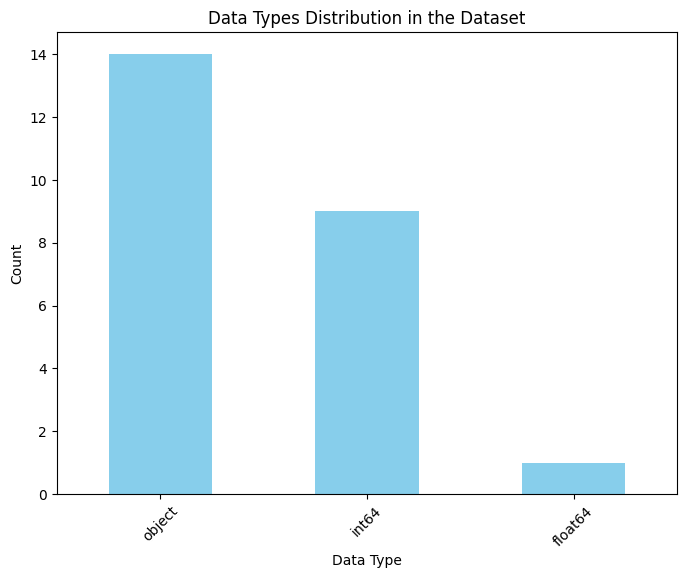

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'dataset' is your DataFrame
# Example: dataset = pd.read_csv('your_dataset.csv')

# Get the data types of each column
dtypes = dataset.dtypes.value_counts()

# Create a bar chart to visualize the data types
plt.figure(figsize=(8, 6))
dtypes.plot(kind='bar', color='skyblue')
plt.title('Data Types Distribution in the Dataset')
plt.xlabel('Data Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


In [ ]:
dataset.dtypes.value_counts()

,count
object,14
int64,9
float64,1


In [ ]:
dataset.dtypes

,0
CDPHId,int64
ProductName,object
CSFId,float64
CSF,object
CompanyId,int64
CompanyName,object
BrandName,object
PrimaryCategoryId,int64
PrimaryCategory,object
SubCategoryId,int64


In [ ]:
dataset.columns

Index(['CDPHId', 'ProductName', 'CSFId', 'CSF', 'CompanyId', 'CompanyName',
       'BrandName', 'PrimaryCategoryId', 'PrimaryCategory', 'SubCategoryId',
       'SubCategory', 'CasId', 'CasNumber', 'ChemicalId', 'ChemicalName',
       'InitialDateReported', 'MostRecentDateReported', 'DiscontinuedDate',
       'ChemicalCreatedAt', 'ChemicalUpdatedAt', 'ChemicalDateRemoved',
       'ChemicalCount', 'DiscontinuedFlag', 'ChemicalRemovedFlag'],
      dtype='object')

| **Column Name**          | **Description**                                                                                                                                                                                                                                                          |
|--------------------------|--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| **CDPHId**               | Likely an identifier associated with a specific regulatory or health-related database. “CDPH” often stands for the "California Department of Public Health" or a similar public health organization. This could be a unique ID used by that department to track a particular product or listing. |
| **ProductName**          | The name of the product being referenced. This is generally the commercial or common name used in the marketplace.                                                                                                                                                       |
| **CSFId**                |  "Chemical Source File" ID. In many regulatory contexts, “CSF” is used to denote a record or ID related to the composition of a product or a formula associated with it.                                    |
| **CSF**                  | The actual Confidential Statement of Formula (if provided) or a textual reference to a formula listing. It may also be a code indicating the type of chemical composition or formula details.                                                                                   |
| **CompanyId**            | A unique identifier for the company associated with the product. Useful for joining or linking this data to a separate table of company information.                                                                                                                        |
| **CompanyName**          | The name of the company that manufactures or distributes the product.                                                                                                                                                                                                 |
| **BrandName**            | The brand under which the product is sold, which might differ from the parent company’s name if they own multiple brands.                                                                                                                                                  |
| **PrimaryCategoryId**    | A unique identifier for the product’s primary category. This might be used for classification within a taxonomy of products (e.g., "Household Cleaners," "Personal Care Products," etc.).                                                                                     |
| **PrimaryCategory**      | The textual name or label of the product’s primary category (e.g., "Personal Care").                                                                                                                                                                                   |
| **SubCategoryId**        | A unique identifier for a more specific classification that falls under the primary category. For instance, if the PrimaryCategory is "Personal Care," a SubCategory could be "Shampoo."                                                                                         |
| **SubCategory**          | The textual name of the sub-category (e.g., "Shampoo").                                                                                                                                                                                                                |
| **CasId**                | An internal or database-specific ID tied to a chemical. This may not be the same as the CAS Registry Number, but rather a unique identifier in the dataset.                                                                                                                 |
| **CasNumber**            | The CAS (Chemical Abstracts Service) Registry Number, a unique numerical identifier assigned to every chemical substance reported in the open scientific literature. It is commonly used to identify a chemical unambiguously.                                                |
| **ChemicalId**           | A database-specific unique identifier for a particular chemical. This might be used to link to a chemical details table.                                                                                                                                                 |
| **ChemicalName**         | The common or standardized name of the chemical in the product. Often corresponds to the IUPAC name or another widely recognized chemical name.                                                                                                                              |
| **InitialDateReported**  | The first date when this product-chemical combination was reported. It might correspond to when it was first introduced, registered, or discovered in the dataset.                                                                                                            |
| **MostRecentDateReported** | The latest date on record when this product-chemical information was updated or confirmed. Useful for historical tracking of chemical usage in the product.                                                                                                                   |
| **DiscontinuedDate**     | If applicable, the date when the product was discontinued or the chemical was no longer used in the product.                                                                                                                                                              |
| **ChemicalCreatedAt**    | The timestamp or date when the chemical record was created in the database. This is a metadata field used for internal data management.                                                                                                                                        |
| **ChemicalUpdatedAt**    | The timestamp or date of the most recent update to the chemical record. Another metadata field important for audit and version control.                                                                                                                                     |
| **ChemicalDateRemoved**  | The date the chemical was removed from the dataset or from the product’s formulation. This might correspond to regulatory changes, reformulation, or product retirement.                                                                                                       |
| **ChemicalCount**        | Potentially the count of how many chemicals are associated with a product, or how frequently this particular chemical appears across different products. The exact meaning depends on the dataset’s design—this could be a summary field.                                       |


In [ ]:
dataset.sample(5).T

,88183,57827,5140,69208,110741
CDPHId,32505,20995,1616,25222,40272
ProductName,SEPHORA - COLORFUL OMBRE A PAUPIERES DECLIPSAB...,Rimmel - London Salon Pro with Lycra Nail Polish,Paint My Moji-toes Red,SHISEIDO SHEER AND PERFECT FOUNDATION,Ethereal Elements - Beauty Boss Lip Gloss
CSFId,48390.0,31227.0,0.0,39736.0,62503.0
CSF,332 Flawless,Raggae Splash,Missing_CSF,I100,Pink Slip
CompanyId,198,171,11,1011,1332
CompanyName,S+,Coty,OPI PRODUCTS INC.,Shiseido Americas Corporation,Stila Style LLC.
BrandName,SEPHORA,Rimmel - London,OPI Nail Lacquer,SHISEIDO,Stila Styles LLC
PrimaryCategoryId,44,59,59,106,44
PrimaryCategory,Makeup Products (non-permanent),Nail Products,Nail Products,Sun-Related Products,Makeup Products (non-permanent)
SubCategoryId,48,65,65,107,52


No charts were generated by quickchart


In [ ]:
import plotly.express as px

# Prepare the missing report data
missing_report_filtered = (
    missing_report
    .reset_index()
    .rename(columns={'index': 'Column'})
    .query('Missing_Percentage > 0')
    .sort_values('Missing_Percentage', ascending=True)
)

# Define the Celanese brand colors based on extracted shades
celanese_colors = ['#F07823', '#F05500', '#D14A23', '#A44F56']  # Using the extracted colors

# Create a horizontal bar plot with text labels
fig = px.bar(
    missing_report_filtered,
    x='Missing_Percentage',
    y='Column',
    orientation='h',
    title='Percentage of Missing Values by Column',
    color='Missing_Percentage',
    color_continuous_scale=celanese_colors,  # Use the updated color palette
    template='plotly_white',
    hover_data={'Missing_Percentage': ':.2f'},
    text='Missing_Percentage'
)

# Update trace for text formatting
fig.update_traces(
    texttemplate='%{text:.2f}%',
    textposition='inside',
    textfont=dict(color='white')
)

# Update layout for better aesthetics
fig.update_layout(
    xaxis_title="Missing Values (%)",
    yaxis_title="Column",
    height=600,
    width=900,
    margin=dict(l=150, r=50, t=80, b=50),
    coloraxis_colorbar=dict(title="Missing %")
)

# Customize axes
fig.update_xaxes(showgrid=True, gridcolor='lightgray', zeroline=False)
fig.update_yaxes(categoryorder='total ascending')

# Display the figure
fig.show()


In [ ]:
dfmissing_values = dataset.isnull().sum()
total_rows = len(dataset)

missing_report = (missing_values
                  .to_frame('Missing Count')
                  .assign(Missing_Percentage=lambda x: x['Missing Count'] / total_rows * 100)
                  .sort_values('Missing_Percentage', ascending=False))



with pd.option_context('display.float_format', '{:.2f}%'.format):
    print("Missing Values Report:")
    print(missing_report)


Missing Values Report:
                        Missing Count  Missing_Percentage
ChemicalDateRemoved            111396              97.39%
DiscontinuedDate               101508              88.75%
CDPHId                              0               0.00%
ProductName                         0               0.00%
DiscontinuedFlag                    0               0.00%
ChemicalCount                       0               0.00%
ChemicalUpdatedAt                   0               0.00%
ChemicalCreatedAt                   0               0.00%
MostRecentDateReported              0               0.00%
InitialDateReported                 0               0.00%
ChemicalName                        0               0.00%
ChemicalId                          0               0.00%
CasNumber                           0               0.00%
CasId                               0               0.00%
SubCategory                         0               0.00%
SubCategoryId                       0            

In [ ]:
file_path = r"C:\Users\ncher\Desktop\dataset.csv"

dataset.to_csv(file_path, index=False)

print(f"Dataset successfully saved to {file_path}")


Dataset successfully saved to C:\Users\ncher\Desktop\dataset.csv


In [ ]:
# Calculate value counts for 'PrimaryCategory' including counts and percentages
primary_category_counts = dataset['SubCategory'].value_counts(dropna=False)

# Calculate the percentage for each PrimaryCategory
primary_category_percentages = dataset['SubCategory'].value_counts(dropna=False, normalize=True) * 100

# Round the percentages to 2 decimal places and add the '%' symbol
primary_category_percentages = primary_category_percentages.round(2).astype(str) + '%'

# Combine count and percentage into a DataFrame for better presentation
primary_category_summary = pd.DataFrame({
    'Count': primary_category_counts,
    'Percentage': primary_category_percentages
})

# Print the summary for 'PrimaryCategory'
print(primary_category_summary.head(25))


                                                    Count Percentage
SubCategory                                                         
Lip Color - Lipsticks, Liners, and Pencils          16553     14.47%
Eye Shadow                                          15744     13.76%
Foundations and Bases                               14095     12.32%
Nail Polish and Enamel                               9945      8.69%
Lip Gloss/Shine                                      8972      7.84%
Eyeliner/Eyebrow Pencils                             5948       5.2%
Face Powders                                         4927      4.31%
Sunscreen (making a cosmetic claim)                  4557      3.98%
Blushes                                              4082      3.57%
Skin Moisturizers (making a cosmetic claim)          3364      2.94%
UV Gel Nail Polish                                   3136      2.74%
Body Washes and Soaps                                2174       1.9%
Other Makeup Product              

In [ ]:
dataset['BrandName'].value_counts()

,count
BrandName,
SEPHORA,3394
NYX,3227
bareMinerals,3158
Charlotte Tilbury,2451
Revlon,2335
...,...
Arbonne Liquid Sunshine,1
Soap & glory,1
880620\t,1


In [ ]:
dataset['BrandName'].value_counts()

,count
BrandName,
SEPHORA,3394
NYX,3227
bareMinerals,3158
Charlotte Tilbury,2451
Revlon,2335
...,...
Arbonne Liquid Sunshine,1
Soap & glory,1
880620\t,1


In [ ]:
# Calculate value counts for 'PrimaryCategory' including counts and percentages
primary_category_counts = dataset['BrandName'].value_counts(dropna=False)

# Calculate the percentage for each PrimaryCategory
primary_category_percentages = dataset['BrandName'].value_counts(dropna=False, normalize=True) * 100

# Round the percentages to 2 decimal places and add the '%' symbol
primary_category_percentages = primary_category_percentages.round(2).astype(str) + '%'

# Combine count and percentage into a DataFrame for better presentation
primary_category_summary = pd.DataFrame({
    'Count': primary_category_counts,
    'Percentage': primary_category_percentages
})

# Print the summary for 'PrimaryCategory'
print(primary_category_summary)


                         Count Percentage
BrandName                                
SEPHORA                   3394      2.97%
NYX                       3227      2.82%
bareMinerals              3158      2.76%
Charlotte Tilbury         2451      2.14%
Revlon                    2335      2.04%
...                        ...        ...
Arbonne Liquid Sunshine      1       0.0%
Soap & glory                 1       0.0%
880620\t                     1       0.0%
880775                       1       0.0%
Ion / Cover your Gray        1       0.0%

[2714 rows x 2 columns]


In [ ]:
primary_category_summary

,Count,Percentage
BrandName,,
SEPHORA,3394,2.97%
NYX,3227,2.82%
bareMinerals,3158,2.76%
Charlotte Tilbury,2451,2.14%
Revlon,2335,2.04%
...,...,...
Arbonne Liquid Sunshine,1,0.0%
Soap & glory,1,0.0%
880620\t,1,0.0%


from matplotlib import pyplot as plt
primary_category_summary['Count'].plot(kind='hist', bins=20, title='Count')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
primary_category_summary['Count'].plot(kind='line', figsize=(8, 4), title='Count')
plt.gca().spines[['top', 'right']].set_visible(False)